# Training a Quantum Model on a Real Dataset:
    This tutorial will demonstrate how to train a quantum machine learning model to tackle a classification problem. For comparison, we'll first train a classical counterpart to the quantum model.
#### SVC is a specific implementation of the Support Vector Machine (SVM) algorithm that is designed specifically for classification tasks.
#### SVM a type of supervised learning algorithm used in machine learning to solve classification and regression tasks.
## Sec-1:
# Training Model Classically - Using Support Vector Classifier (SVC) Over Penguins Dataset:
### In this section we will be training the data over the train dataset and test it over test dataset.

### Tools used in this Cell:
##### pandas  - Pandas is a data manipulation package/library in Python for tabular data.  
##### seaborn - Seaborn is a library for making statistical graphics in Python.
##### train_test_split  - It is used to split the dataset into desired ratio.
##### algorithm_globals - It is used to fix the random seeds.

In [24]:
import pandas as pd
import seaborn as sns

# train_test_split is used to split the dataset into desired ratio.
from sklearn.model_selection import train_test_split

# algorithm_globals is used to fix the random seeds.
from qiskit_algorithms.utils import algorithm_globals

# SVC "Support Vector Classifier" is used for Classification
from sklearn.svm import SVC

penguins_data = sns.load_dataset('penguins')
penguins_data = penguins_data.dropna()
print (penguins_data.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  



### Let's get total number of features and print them.

##### Here '.shape[1]' returns a tuple containing the dimensions of the dataframe and '1' allows to access the second element of that which is the
##### number of coloumns - hence the number of features.   

In [2]:
num_features = penguins_data.shape[1]
print(f"Total number of features: {num_features}")

print(penguins_data.columns)

Total number of features: 7
Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


##### This cell will print the unique entries of the given features.

In [3]:
print(penguins_data["species"].unique())

unique_island = penguins_data["island"].unique() #this is required for next step
print(unique_island)

unique_s = penguins_data["sex"].unique()
print(unique_s)

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['Male' 'Female']



##### Since SVC cannot work with character type entries. Therefore we will convert the unique entries to integers. Here the maping is used,
##### in this method a dictionary is created which contains index values corresponding to each unique entry as a integer.

In [4]:
island_int_mapping = {string: i for i, string in enumerate(unique_island)}
sex_int_mapping = {string: i for i, string in enumerate(unique_s)}

# Applying the mapping to the DataFrame

penguins_data['island'] = penguins_data['island'].map(island_int_mapping)
penguins_data['sex'] = penguins_data['sex'].map(sex_int_mapping)

print(penguins_data)

    species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie       0            39.1           18.7              181.0   
1    Adelie       0            39.5           17.4              186.0   
2    Adelie       0            40.3           18.0              195.0   
4    Adelie       0            36.7           19.3              193.0   
5    Adelie       0            39.3           20.6              190.0   
..      ...     ...             ...            ...                ...   
338  Gentoo       1            47.2           13.7              214.0   
340  Gentoo       1            46.8           14.3              215.0   
341  Gentoo       1            50.4           15.7              222.0   
342  Gentoo       1            45.2           14.8              212.0   
343  Gentoo       1            49.9           16.1              213.0   

     body_mass_g  sex  
0         3750.0    0  
1         3800.0    1  
2         3250.0    1  
4         3450.0    1  
5  


##### In this step we will define the variables. Here ".drop('species', axis=1)" will be used to assign the data to features variable excluding the species coloumn.

In [5]:
features = penguins_data.drop('species', axis=1)
labels = penguins_data['species']

##### Now, we will define 'df' variable that contains coloumns from original DataFrame along with new coloumn called 'class' with has species
##### corresponding to each row of the original DataFrame.

In [6]:
df = pd.DataFrame(penguins_data[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']], columns=['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'])
df["class"] = penguins_data['species']


##### Here is a simple method to plot 'df' using pairplot.
##### "pairplot" function from the sns library is used to create a pair plot. A pair plot is a grid of scatterplots showing relationships between pairs of variables in a dataset.
##### The hue parameter is used to color the data points based on a categorical variable. In this case, the "class"
##### palette parameter is used to set the color palette for the different classes. "tab10" is one of the predefined color palettes in Seaborn

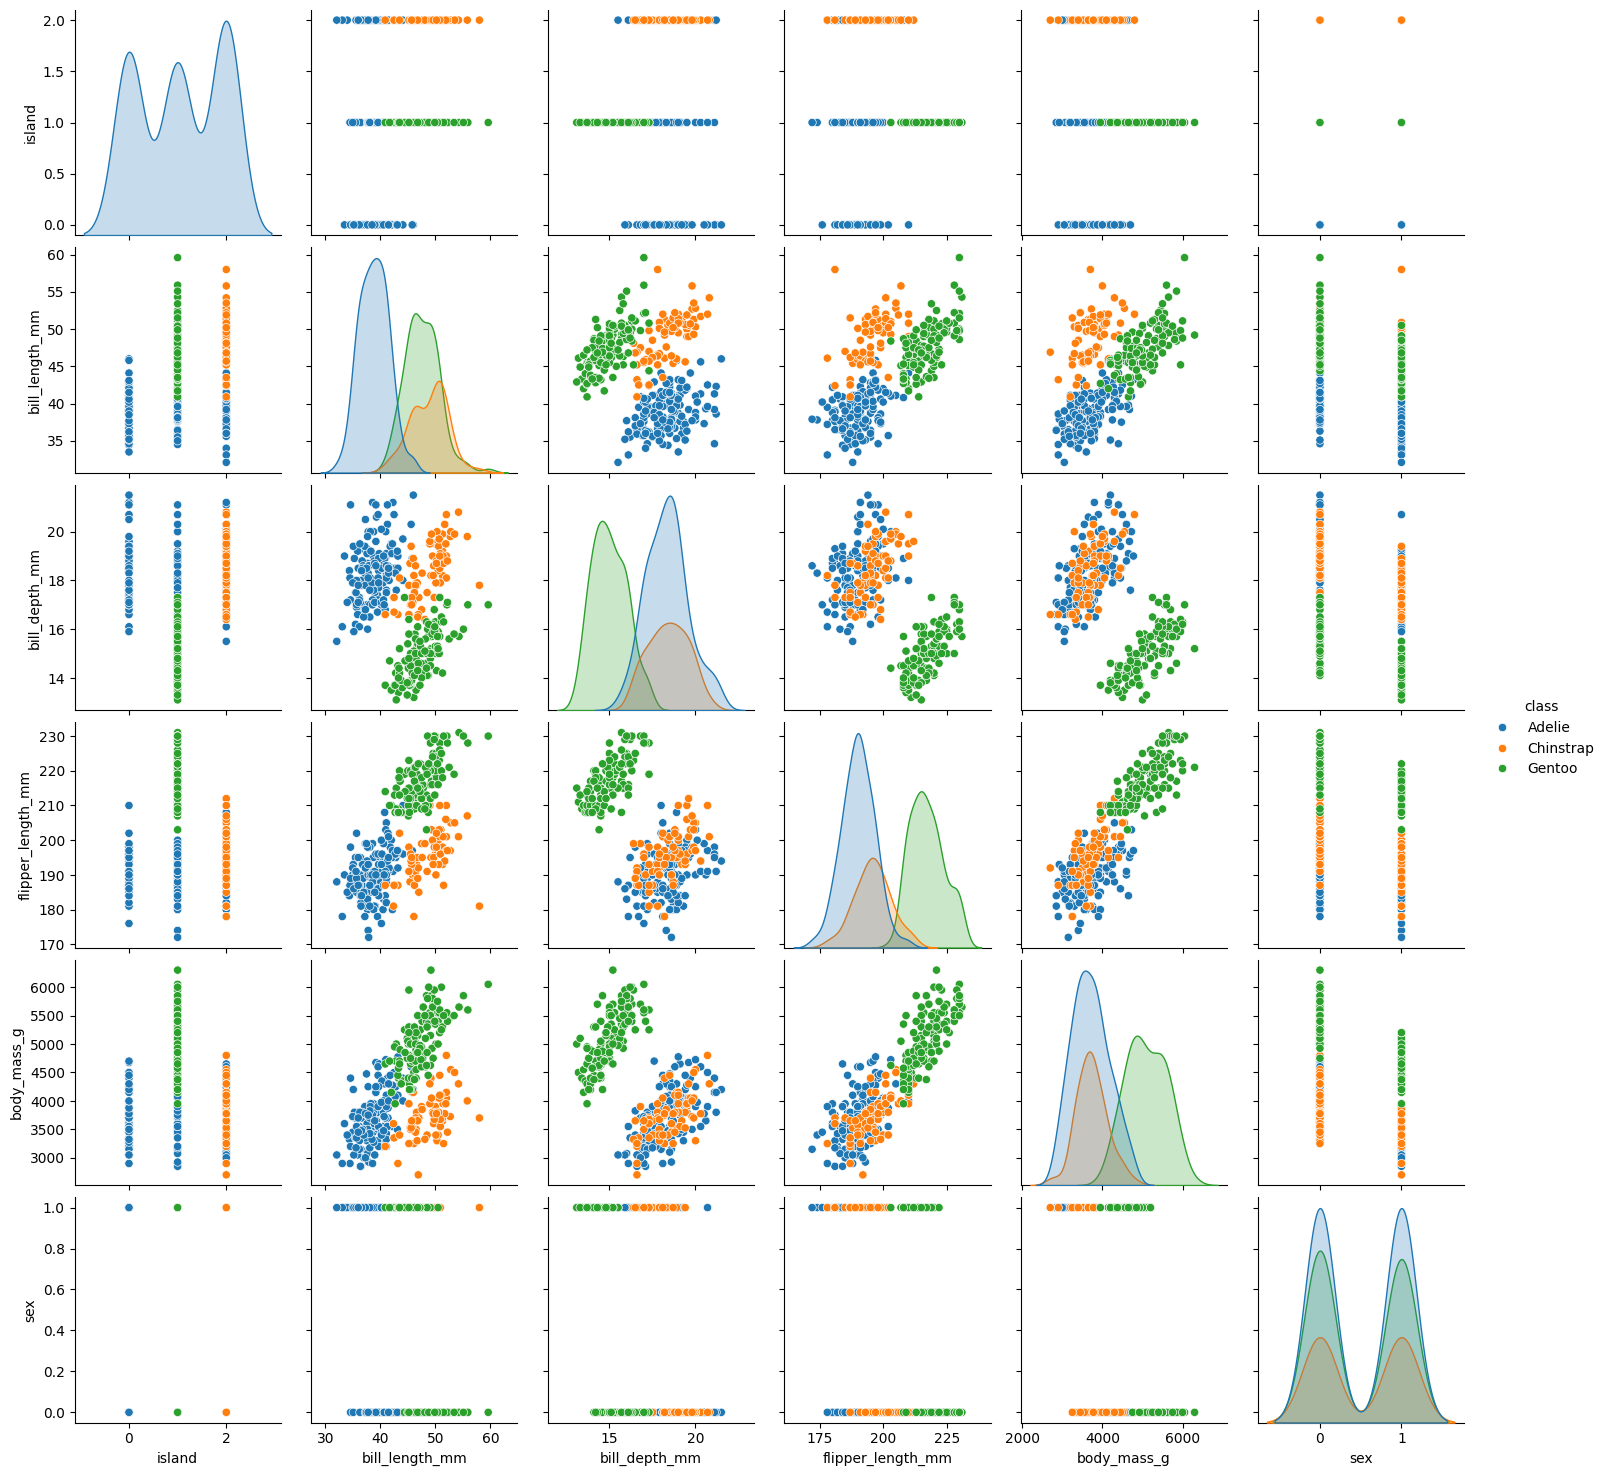

In [7]:
sns.pairplot(df, hue="class", palette="tab10")


##### Now, recall that we have imported 'algorithm_globals' and 'train_test_split' in the very first cell of this notebook.
##### Those are now required for this next step.
    - This cell consist of two different steps 1st will fix the seed to the desired value for the consistent reproducible results and
    - 2nd will split the dataset into two different datasets for training and testing.

In [8]:
algorithm_globals.random_seed = 123

train_features, test_features, train_labels, test_labels = train_test_split(features, labels,train_size=0.8, random_state=algorithm_globals.random_seed)


##### MinMaxScaler is used to normalized the features within [0,1]. Normalization is a common technique in machine learning
##### and often leads to better numerical stability and convergence of an algorithm.

In [9]:
from sklearn.preprocessing import MinMaxScaler
train_features = MinMaxScaler().fit_transform(train_features)


#### Finally, it's time to put our hard work to the test as we train the model.

In [10]:
svc = SVC()
_ = svc.fit(train_features, train_labels)

### Results:

In [11]:
train_score_c3 = svc.score(train_features, train_labels)
test_score_c3 = svc.score(train_features, train_labels)

print(f"classical SVC on the training dataset: {train_score_c3: .2f}")
print(f"Classical SVC on the test dataset:     {test_score_c3: .2f}")

classical SVC on the training dataset:  1.00
Classical SVC on the test dataset:      1.00


## Sec-2:
# Quantum Mechanically - Using Variational Quantum Classifier (VQC)

#### Our data is classical, composed of bits, not qubits, requiring encoding into qubits for an effective quantum model.
#### This process, termed data encoding, data embedding, or data loading, is facilitated by the feature map.
##### Our choice of feature map will be the ZZFeatureMap. The ZZFeatureMap is one of the standard feature maps in the Qiskit circuit library.
##### We pass num_features as feature_dimension, meaning the feature map will have num_features or 4 qubits.

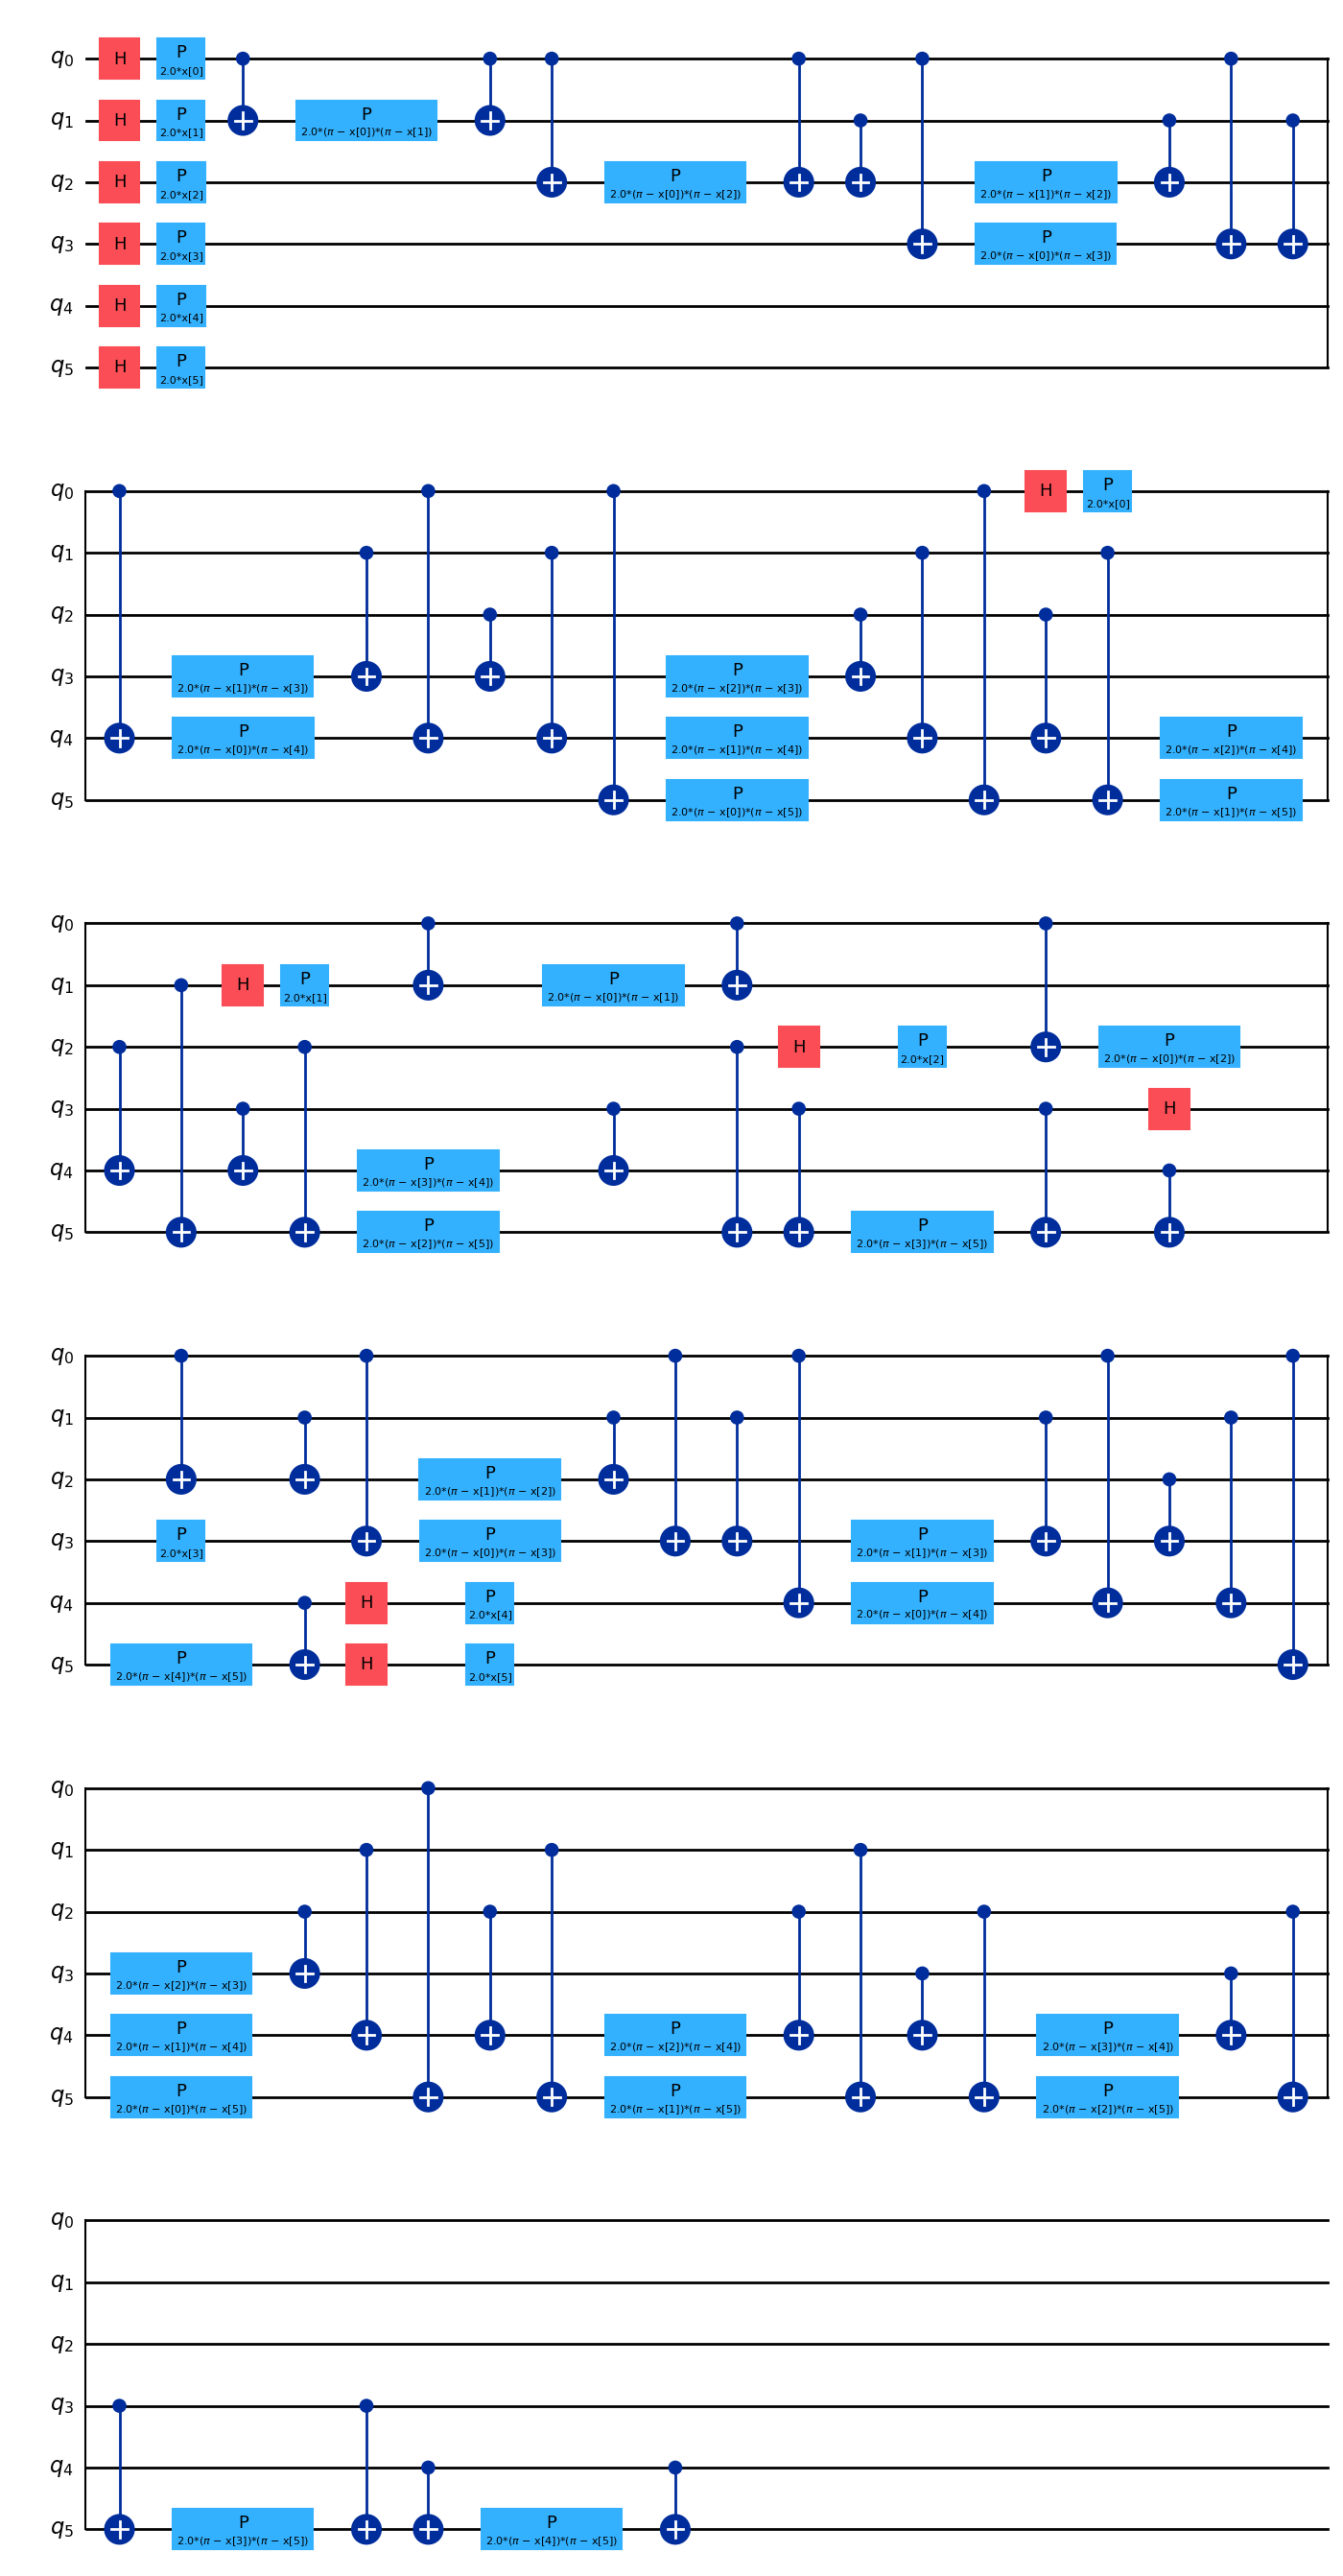

In [12]:
#from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)
feature_map.decompose().draw(output="mpl", fold=20, style="iqp") #Be Carefull it's 'mpl' not 'mp1'


## Before proceeding further, it's essential to grasp some key aspects of Quantum Machine Learning (QML):
#### # Ansatz - 
    An "ansatz" is a proposed structure of a quantum state or quantum circuit used to solve a particular problem.
### # Quantum Gates - 
    Just like logic gates in classical methods (OR, AND, XOR, etc.) there are "Quantum Logic Gates". Two of them are "Hadamard gate" and "CNOT gate".
##### Below cell will creates an ansatz as trial wave-function.
##### The fold=20 parameter specifies that the circuit should be folded to fit within a width of 20 columns, and style='iqp'
##### specifies the drawing style as 'iqp' (Interactive Quantum Protocols).

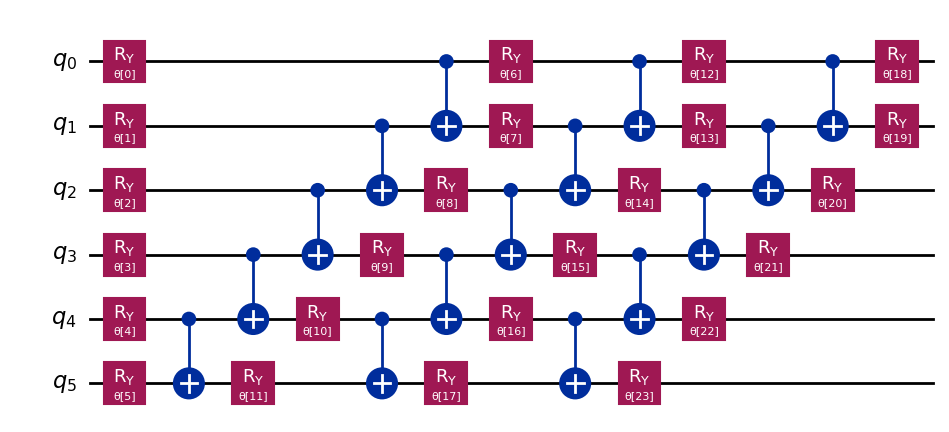

In [13]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output='mpl', fold=20, style='iqp')

##### Below cell will define an optimizer. Our choice of optimizer will be COBYLA.

In [14]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=200)


##### In the next step, we will define where to train our classifier. We can train on a simulator or a real quantum computer.
##### Here, we will use a simulator. We create an instance of the Sampler primitive.
##### Using qiskit runtime services you can create a sampler that is backed by a quantum computer.

In [15]:
from qiskit.primitives import Sampler

sampler = Sampler()


##### This next cell will plot the objective function value against the iteration number using matplotlib.pyplot.
##### The title, x-label, and y-label are set accordingly. The plot is then displayed using plt.show().

In [16]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


#### Finally, now it's time to train our model using QML.
#### Tools used in this cell:
##### # numpy - NumPy is a Python library used for working with arrays. It has functions to work with linear algebra, fourier transform, and matrices.
##### # time  - It is required to use the time() function to get the current time in seconds since the epoch.
##### # VQC   - Just like SVC, in QML we have VQC provided by qiskit. A VQC is a quantum circuit with adjustable parameters that are optimized according to a predefined metric, such as an objective function.

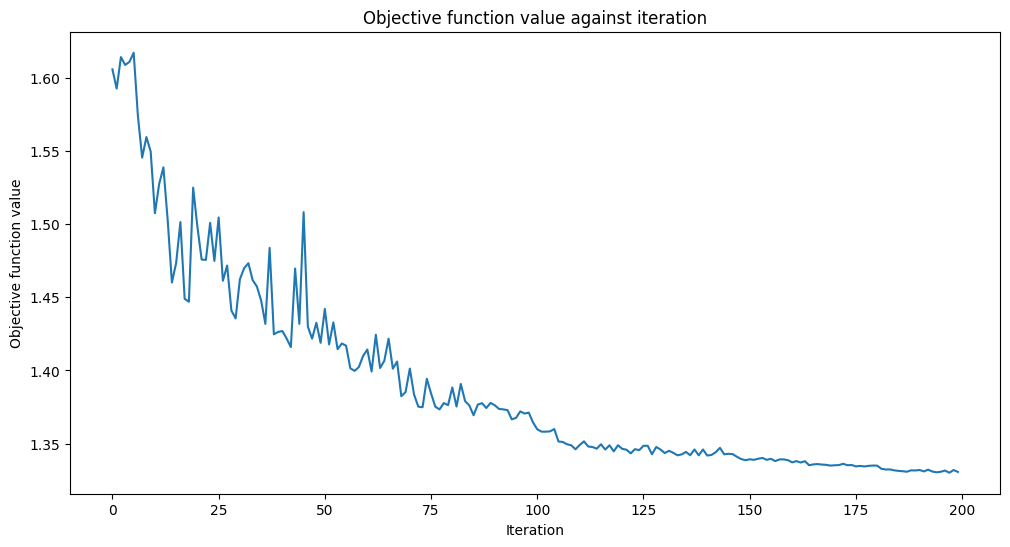

Training time: 205 seconds


In [17]:
import numpy as np
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
#vqc.fit(train_features_np, train_labels_np)
vqc.fit(np.array(train_features), np.array(train_labels))
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

#### Let's test our model just like before:

In [18]:
train_score_q3 = vqc.score(train_features, train_labels)
test_score_q3 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q3:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q3:.2f}")

Quantum VQC on the training dataset: 0.76
Quantum VQC on the test dataset:     0.34


## Sec-3:
### Now, we will repeat all the steps from the VQC part above but this time we use "PauliFeatureMap" instead of "ZZFeaturemap".

In [19]:
# Importing the featuremap and creating an ansatz just like before.
from qiskit.circuit.library import PauliFeatureMap

num_features = features.shape[1]

feature_map = PauliFeatureMap(feature_dimension=num_features, reps=2)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

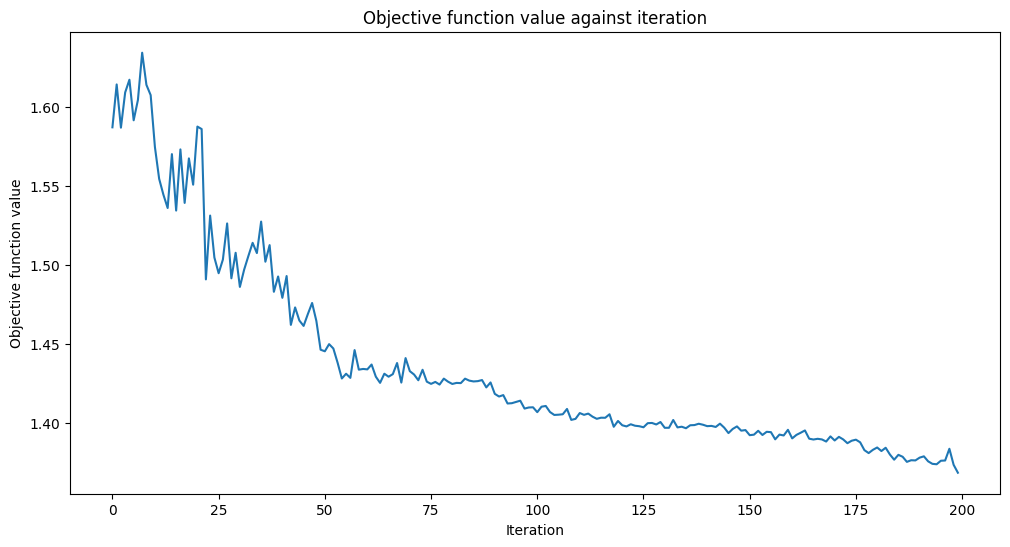

Training time: 202 seconds


In [20]:
# Training the model using VQC again.
train_labels = train_labels.to_numpy().reshape(-1, 1)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)


start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [21]:
#Testing the score:
train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.65
Quantum VQC on the test dataset using RealAmplitudes:     0.45


## Sec-4:
### Lastly, let's do it again while using "EfficientSU2" as featuremap:

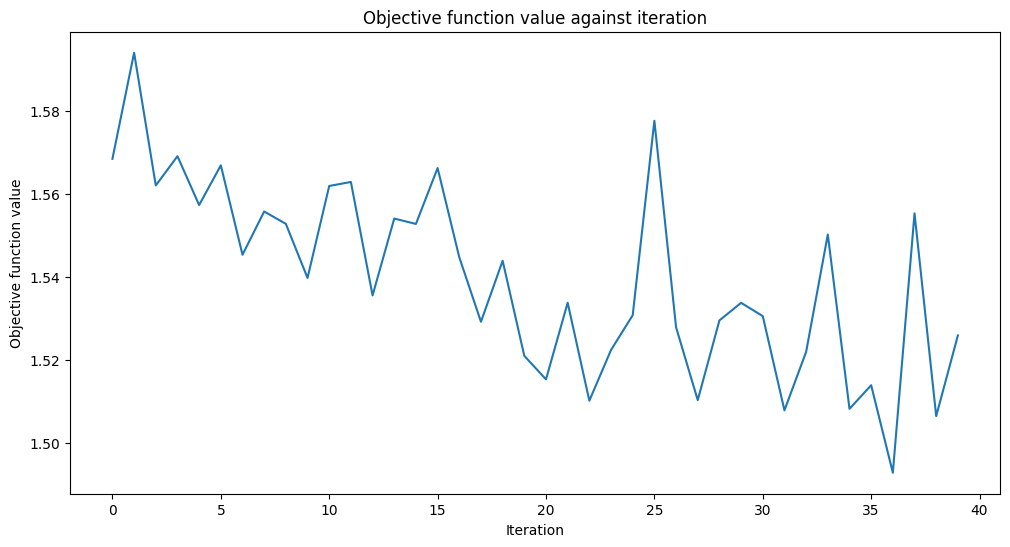

Training time: 47 seconds


In [22]:
# Importing featuremap.
from qiskit.circuit.library import EfficientSU2

# Defining ansatz.
ansatz = EfficientSU2(num_qubits=num_features, reps=3)

# Defining optimizer.
optimizer = COBYLA(maxiter=40)

# Training the model.
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [23]:
# Testing the results:
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.49
Quantum VQC on the test dataset using EfficientSU2:     0.25
